# EDA of Spike sorted with kilosort and manually clustered with phy2

Dataset:
**JG14_190621**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
import importlib
import os
import sys
import platform

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

%matplotlib notebook

## 0 Data Wrangling

Loading necessary files

folder = 'C:\Users\Nutzer\Google Drive\1 Uni\1.3 Uni Projekte\Masterarbeit Laborarbeit Neuroscience\Data   
Analysis\JG14_190621\electrophysiology'; 
spike_times.npy  
spike_clusters.npy  
cluster_group.tsv  
cluster_info.tsv  


In [2]:
session = 'JG14_190621'
gamble_side = 'right'

if platform.system() == 'Linux':
    # Linux
    os.chdir("/home/max/ExpanDrive/Google Drive/3.1 Code Repository/1.4-klausbergerlab-spikes/")
    from spikes_class import SpikeAnalysis
    folder = "/home/max/ExpanDrive/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis/JG14_190621"
elif platform.system() == 'Windows':
    # windows
    os.chdir(r"C:\Users\User\Google Drive\3.1 Code Repository\1.4-klausbergerlab-spikes")
    from spikes_class import SpikeAnalysis
    folder = r"C:\Users\User\Google Drive\3 Projekte\Masterarbeit Laborarbeit Neuroscience\1 Data Analysis\JG14_190621"

spikes = SpikeAnalysis(session, folder, gamble_side)
spikes.trials_df.loc[0:6, 'select'] = False
spikes.trials_df.loc[215:, 'select'] = False

---

### Spike & Trials & Behavior info ✔
from phenosys necoded in ttl
- all times are in sampling rate (20k per Second)
- Infromation about what was encoded from phenosys (behavior) to intern recording [coding of ttl signal phenosys](https://www.notion.so/4b534b46cb5f4611b31b6b0ac0b1712b)

In [4]:
spikes.spikes_df

,,cluster,spike_times
global index,cluster index,,
0,0,182,147
1,0,51,215
2,0,54,218
3,0,99,257
4,0,120,287
...,...,...,...
622358,12892,106,22702646
622359,1292,82,22702655
622360,5320,94,22702670


In [5]:
spikes.trials_df

,start,cue,sound,openl,reward,iti,end,event,length_ms,length,select
trial,,,,,,,,,,,
1,184261,204966,205627,206346,346501,346782,347017,0,8137.80,162756,False
2,347296,367357,367997,368675,469942,488083,508307,5,8050.55,161011,False
3,508590,528631,529285,529965,540668,558808,579008,5,3520.90,70418,False
4,579268,599314,599969,600650,613871,614030,634233,6,2748.25,54965,False
5,751059,771123,771761,772445,780009,783821,804022,8,2648.15,52963,False
6,804302,824363,825003,825685,838970,842731,862946,8,2932.20,58644,False
7,863207,883328,883968,884667,889192,907328,927529,6,3216.10,64322,True
8,927792,947831,948491,949172,957333,975474,995674,6,3394.10,67882,True
9,995938,1015977,1016615,1017298,1020095,1038217,1058417,5,3123.95,62479,True


### Trial times and differences in times ✔
- clean up trials -> only use interesting ones

<IPython.core.display.Javascript object>


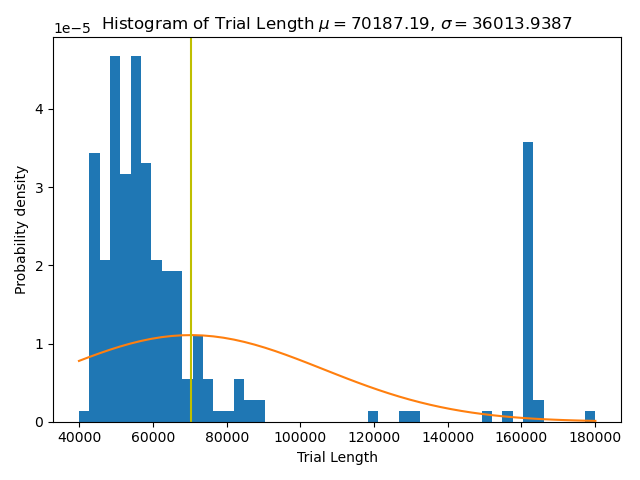

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x216e87aeb48>)

In [11]:
spikes.plt_trial_hist_and_fit(spikes.trials_df.loc[:, 'length'])

<IPython.core.display.Javascript object>


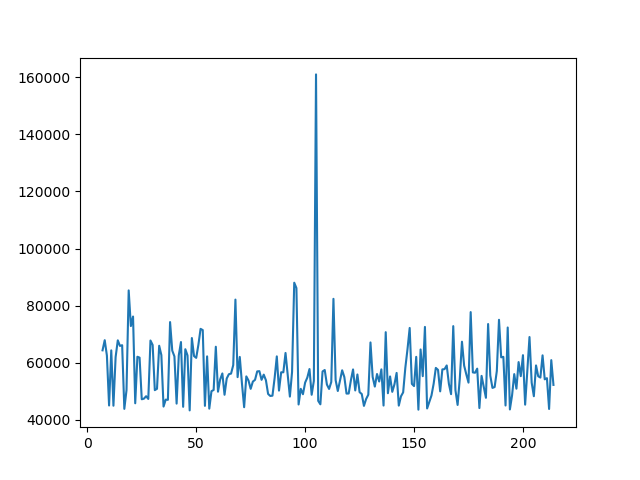

In [12]:
spikes.plt_trial_length()

In [13]:
#spikes.trials_df.loc[np.r_[0:6, 215:], 'select']
spikes.trials_df.loc[0:6, 'select'] = False
spikes.trials_df.loc[215:, 'select'] = False
spikes.trials_df

,start,cue,sound,openl,reward,iti,end,event,length_ms,length,select
trial,,,,,,,,,,,
1,184261,204966,205627,206346,346501,346782,347017,0,8137.80,162756,False
2,347296,367357,367997,368675,469942,488083,508307,5,8050.55,161011,False
3,508590,528631,529285,529965,540668,558808,579008,5,3520.90,70418,False
4,579268,599314,599969,600650,613871,614030,634233,6,2748.25,54965,False
5,751059,771123,771761,772445,780009,783821,804022,8,2648.15,52963,False
6,804302,824363,825003,825685,838970,842731,862946,8,2932.20,58644,False
7,863207,883328,883968,884667,889192,907328,927529,6,3216.10,64322,True
8,927792,947831,948491,949172,957333,975474,995674,6,3394.10,67882,True
9,995938,1015977,1016615,1017298,1020095,1038217,1058417,5,3123.95,62479,True


<IPython.core.display.Javascript object>


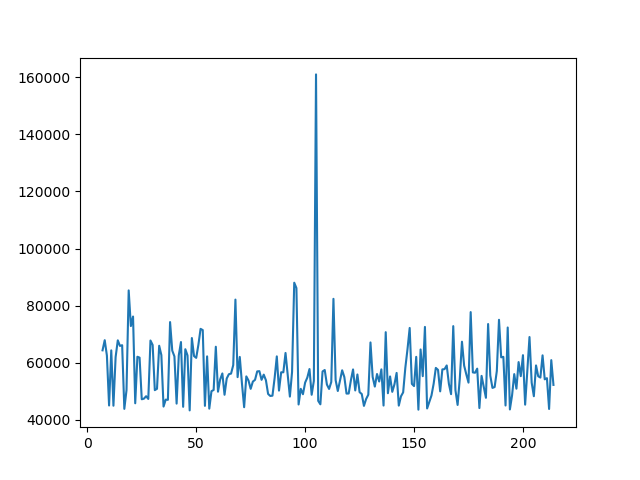

In [9]:
spikes.plt_trial_length()

<IPython.core.display.Javascript object>


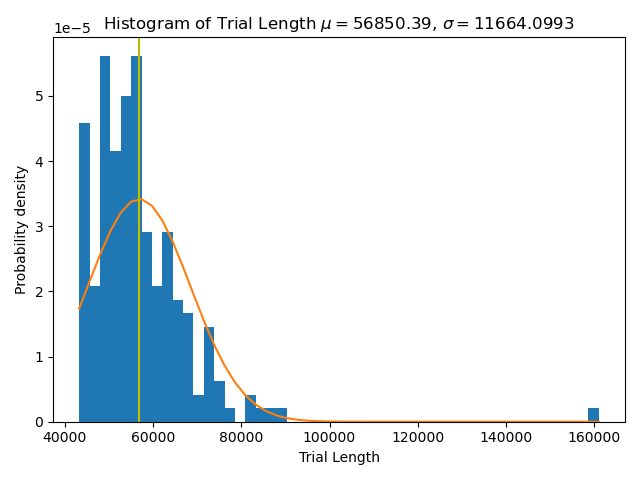

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x216e6958848>)

In [10]:
spikes.plt_trial_hist_and_fit(
    spikes.trials_df.loc[spikes.trials_df.loc[:, 'select'], 'length'])

## 1 EDA
Exploring the Dataset to find out 
1. how trials are different
2. firing behavior of cluster for different trials
3. z scored firing of cluster for all trials
4. comparison between clusters

### Plot Spike Trains for single 

#### plot spike train ✔

<IPython.core.display.Javascript object>


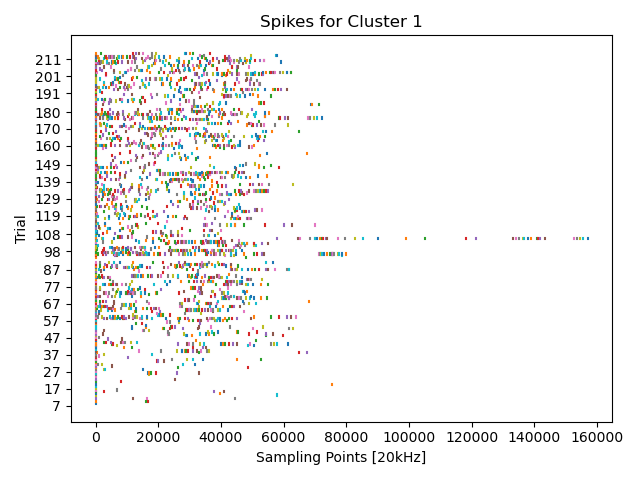

In [3]:
cluster = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == 1]['spike_times']
fig, ax = spikes.plt_spike_train(cluster, spikes.trials_df)
plt.show()

#### spike train 0 = event X ✔

<IPython.core.display.Javascript object>


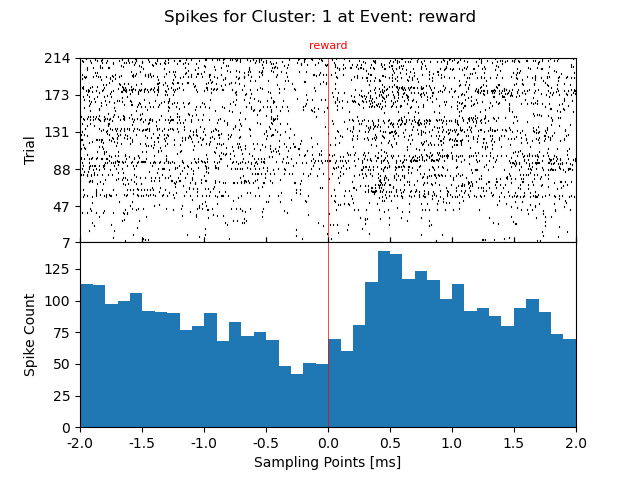

In [3]:
fig, ax = spikes.plt_spike_train_hist(1, spikes.trials_df[spikes.trials_df['select']==True], 'reward', 2000)

#ax[1].set_xlim([-40000, 40000])
plt.show()

In [5]:
import matplotlib as mpl
mpl.use("Agg")  # Prevent showing stuff

spikes.save_plt_spike_train_hist_reward(2000, update=False)

	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 0 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 1 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 3 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 4 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save si

KeyboardInterrupt: 

### Workspace

In [26]:
cluster = 1, 
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]


event = 'reward'
window = 2000

In [9]:
trials = selected_trials[event]
old = trials.index.size
old

31

In [51]:
step = trials.index.size/5
start = 0
stop = trials.index.size+step/2
np.arange(start, stop, step).astype(int)

array([ 0,  6, 12, 18, 24, 31])

In [52]:
trials = selected_trials[event]
liste = list(np.arange(start, stop, step).astype(int))
liste

[0, 6, 12, 18, 24, 31]

In [60]:
stop = trials.index.size
test = trials.index.values[np.arange(start, stop, step).astype(int)]
test = np.append(test, trials.index.values[-1])
test

array([  9,  19,  33,  43,  52, 193], dtype=int64)

In [57]:
trials.index.values

array([  9,  11,  13,  14,  15,  16,  19,  20,  21,  24,  29,  30,  33,
        34,  38,  39,  40,  42,  43,  45,  46,  48,  50,  51,  52,  53,
        91,  96, 155, 191, 193], dtype=int64)

<IPython.core.display.Javascript object>


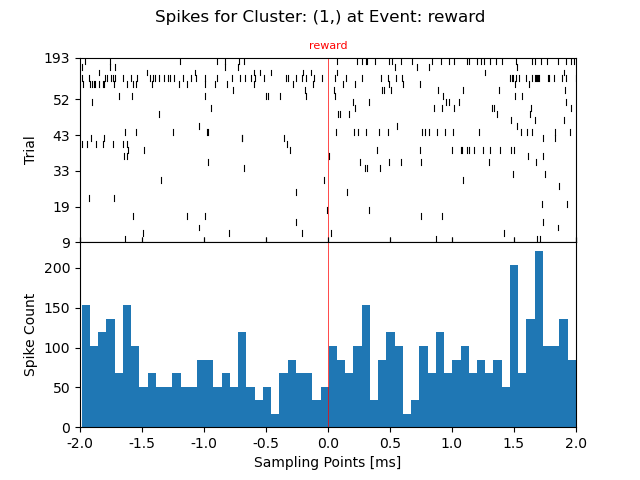

In [61]:
cluster = 1, 
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]


event = 'reward'
window = 2000

fig=None
ax=None
title=None

#=============================

cluster_df = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == cluster]['spike_times']
trials = selected_trials[event]
delta = window*20

# create plot and axis if none is passed
if ax==None or fig==None:
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'hspace': 0})

# loop that iterats trough all indeces in trial df
y = 0
for row in trials.index:
    # define length of spike for row
    ypos = [y, y+1]
    y+=1
    # derive spike times in range delta around event time for trial
    ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
    ar = ar.astype('int64')
    ar = ar - trials[row]
    if ar.size > 0:
        #append to historam data frame
        if 'hist_ar' in locals():
            hist_ar = np.append(hist_ar, ar)
        else:
            hist_ar = ar
        # iterate trough all elements of np array
        for col in ar:
            ## plot spike train=========================
            ax[0].plot([col, col], ypos, 'k-', linewidth=0.8)

## traw red line at event ==============
ax[0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
# spike train y lable
ax[0].set_ylabel('Trial')




# set y axis 1. plot
# set ticks
step = trials.index.size/5
start = 0
stop = trials.index.size+step/2
ax[0].set_yticks(np.arange(start, stop, step).astype(int))
# set tick labels
stop = trials.index.size
label = trials.index.values[np.arange(start, stop, step).astype(int)]
label = np.append(test, trials.index.values[-1])
ax[0].set_yticklabels(label)
# set y limits 1. plot
ax[0].set_ylim([0, stop])




#labels
# specify y tick distance
#ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
# trun x labels inside
ax[0].tick_params(axis="x",direction="in")
# turn of labels on shared x axis only ticks
plt.setp(ax[0].get_xticklabels(), visible=False)
# write event
ax[0].set_title(event, color='red', fontsize=8)

## plot histogram===========================
num_bins = 60
# draw histogram
ax[1].hist(hist_ar, bins=num_bins)
# draw red line at event
ax[1].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
# naming y axis
ax[1].set_ylabel('Spike Count')
# set x ticks to seconds
if window > 1000:
    window = window/1000
step = window/4
start = -window
stop = window+(step/2)
y_index = np.arange(start, stop, step)
ax[1].set_xticklabels(y_index)
# set ticks top and bottom
ax[1].tick_params(axis='x', bottom=True, top=True)
# set x limits
ax[1].set_xlim([-delta, delta])
#ax.set_title('Spikes for Cluster 1')
if title == None:
    fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
else:
    fig.suptitle(title)
# naming
plt.xlabel('Sampling Points [ms]')

plt.show()

In [36]:
y

31

---

In [ ]:
# save images of spike train and histogram plot for all good clusters for all events in trials
# iterate over all trials in trial
path = (folder + r"\figures\spikes\spike-train-hist-event\good\reward_and_noreward" )
import os
if not os.path.isdir(path):
    os.makedirs(path) 
    
for cluster in sapikes.clusters_df.loc[spikes.clusters_df['group']=='good'].index:
    plt_spike_train_hist_event(cluster, 'reward', 2, True, path)

### Spike Train & Histogram for sub events

#### batch plot for all clusters and all reword configurations

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, gridspec_kw={'hspace': 0, 'wspace':2})
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = axs
axs1 = (ax1, ax3)
axs2 = (ax2, ax4)
axs3 = (ax5, ax7)
axs4 = (ax6, ax8)
plt_new_new(1, selected_trials, 'reward', 2, axs1)
plt_new_new(1, selected_trials, 'reward', 2, axs2)
plt_new_new(1, selected_trials, 'reward', 2, axs3)
plt_new_new(1, selected_trials, 'reward', 2, axs4)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


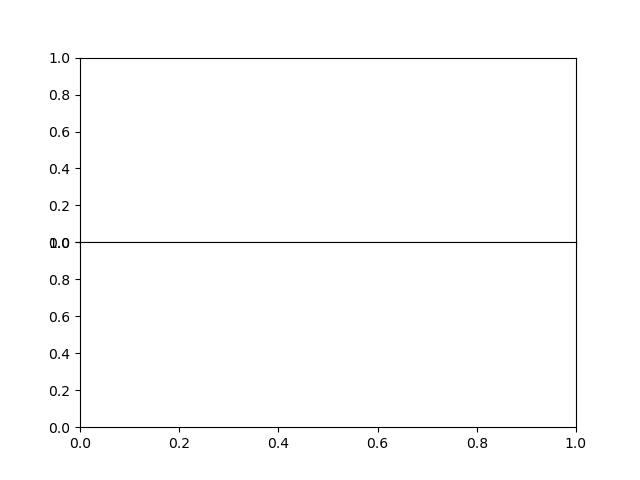

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
spikes.save_plt_spike_train_hist_reward(2000)

In [3]:
included_sections = ['spike_trains_and_histogram']
filename = (session + "-Report")
spikes.create_report(included_sections)

NameError: name 'image_box' is not defined

In [3]:
latex_dict = {}
with open('spike_report_template.tex', 'r') as f:
    keys = ["preample", "title", "after_title", "rest"]
    key = keys[0]
    value = ""
    k = 1
    for line in f.readlines():
        if "%##end" not in line:
            value += line
        else:
            latex_dict[key]=value
            key = keys[k]
            value = ""
            k += 1
latex_dict.pop('title')

'\n% title and stuff\n\\title{\\textbf{Report for JG...}}\n'

In [112]:
with open('filename.json', 'w', encoding='utf8') as json_file:
    json.dump(latex_dict, json_file, indent=4, ensure_ascii=False)

In [5]:
# create latex file
tex_title = r"\title{\textbf{Report for Session: " + session.replace('_', r"\_") + "}}\n"
tex_file_path = folder + "/figures/spikes-report.tex"


with open(tex_file_path, 'w', encoding='utf8') as tex_file:
    tex_file.write(latex_dict['preample'])
    tex_file.write(tex_title)
    tex_file.write(latex_dict['after_title'])
    for cluster in spikes.cluster_df.loc[spikes.cluster_df['group']=='good'].index[0:1]:
        tex_section = r"\subsection*{Cluster " + str(cluster) + "}\n"
        
        tex_summary = (r"% table for all spikes and summary"+"\n"+
                       r"\begin{tabularx}{\textwidth}{X X}"+"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +"-reward.png}} & "+"\n"+
                       r"  \begin{tabular}[t]{ll}"+"\n"+
                       r"    Summary: \\"+"\n"+
                       r"    \hline"+"\n"+
                       r"    \small{Gamble Side:} & \small{" +
                       gambl_side +
                       r"} \Tstrut\\"+"\n"+
                       r"  \end{tabular}\\"+"\n"+
                       r"\end{tabularx}"+"\n"+
                       r"\bigskip"+"\n"
                      )
        
        tex_details = (r"% table for detailed reward events"+"\n"+
                       r"\begin{tabularx}{\textwidth}{X | X}"+"\n"+
                       "  % title\n"+
                       r"  Gambl Side & Save Side \\"+"\n"+
                       "  %reward\n"+
                       r"  Reward & \Tstrut \\"+"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-reward-gambl.png}} &" +"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-reward-save.png}}\Bstrut \\"+"\n"+
                       r"  \hline"+"\n"+
                       "  % no-reward"+"\n"+
                       r"  No-reward & \Tstrut \\"+"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-no-reward-gambl.png}} &" +"\n"+  
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-no-reward-gambl.png}} \\"+"\n"+ 
                       r"\end{tabularx}"+"\n"+
                       "\n"+
                       r"\newpage"+"\n"
                      )

        tex_file.write("\n%========================\n")
        tex_file.write(tex_section)
        tex_file.write(tex_summary)
        tex_file.write(tex_details)      
    tex_file.write(r"\end{document}")

### Spike Frequency Sliding Window

In [112]:
spikes.spike_df.index.name = 'global index'
spikes.spike_df

,cluster,spike_times
global index,,
0,182,147
1,51,215
2,54,218
3,99,257
4,120,287
...,...,...
622358,106,22702646
622359,82,22702655
622360,94,22702670


In [3]:
# non-sliding bin:


# windows width in ms
window = 50
# bin width in clicks

# calculate start of each bin
def bin_count_per_cluster(window, cluster, step=None):
    bwidth_cl = window*20
    cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
    start = cluster.iloc[0].astype(int)
    end = cluster.iloc[-1].astype(int)
    if step == None:
        step = bwidth_cl+1
    else:
        step = step*20000
    # calculate
    # start of each bin
    bin_starts = np.arange(start, end+1-bwidth_cl, step)
    # end of each bin
    bin_ends = bin_starts + bwidth_cl
    # calculate index of last spike for each bin end
    last_idx = cluster.searchsorted(bin_ends, side='left').astype(int)
    # calculate index of first spike for each bin start
    first_idx = cluster.searchsorted(bin_starts, side='left')
    # return number of indexes in between start and end = number of spikes in between
    df = pd.DataFrame({'count':(last_idx - first_idx), 'start index':first_idx, 'bin end time':bin_ends ,'last spike in bin':cluster.iloc[last_idx-1].values})
    df.index.name = 'bin'
    return df



In [4]:
count = bin_count_per_cluster(50, 0)
count

,count,start index,bin end time,last spike in bin
bin,,,,
0,1,0,1892,892
1,0,1,2893,892
2,1,1,3894,3312
3,1,2,4895,3935
4,1,3,5896,5770
...,...,...,...,...
22671,0,1849,22695563,22669863
22672,0,1849,22696564,22669863
22673,0,1849,22697565,22669863


In [9]:
spikes.trials_df

,start,cue,sound,openl,reward,iti,end,event,length_ms,length,select
trial,,,,,,,,,,,
1,184261,204966,205627,206346,346501,346782,347017,0,8137.80,162756,False
2,347296,367357,367997,368675,469942,488083,508307,5,8050.55,161011,False
3,508590,528631,529285,529965,540668,558808,579008,5,3520.90,70418,False
4,579268,599314,599969,600650,613871,614030,634233,6,2748.25,54965,False
5,751059,771123,771761,772445,780009,783821,804022,8,2648.15,52963,False
6,804302,824363,825003,825685,838970,842731,862946,8,2932.20,58644,False
7,863207,883328,883968,884667,889192,907328,927529,6,3216.10,64322,True
8,927792,947831,948491,949172,957333,975474,995674,6,3394.10,67882,True
9,995938,1015977,1016615,1017298,1020095,1038217,1058417,5,3123.95,62479,True


In [11]:
#split bin count per cluster for each trial & count over all trials
end = spikes.trials_df['end']
trial_end_idx = count['bin end time'].values.searchsorted(end, side='left').astype(int)
trial_end_idx = trial_end_idx -1
trial_end_idx

array([  344,   505,   576,   631,   801,   860,   924,   992,  1055,
        1100,  1229,  1274,  1399,  1497,  1563,  1630,  1674,  1765,
        1851,  1924,  2019,  2065,  2202,  2264,  2391,  2438,  2498,
        2545,  2613,  2722,  2911,  2984,  3068,  3131,  3176,  3233,
        3350,  3440,  3505,  3567,  3613,  3749,  3816,  3861,  4101,
        4332,  4375,  4493,  4605,  4719,  4847,  4919,  4991,  5119,
        5191,  5235,  5334,  5384,  5450,  5524,  5615,  5688,  5737,
        5818,  5901,  5972,  6031,  6114,  6169,  6254,  6307,  6351,
        6427,  6481,  6532,  6644,  6699,  6756,  6872,  6927,  6983,
        7037,  7112,  7161,  7209,  7271,  7357,  7408,  7465,  7522,
        7585,  7633,  7759,  7847,  7933,  7979,  8030,  8141,  8194,
        8277,  8342,  8391,  8472,  8645,  8875,  8924,  8981,  9039,
        9092,  9143,  9196,  9291,  9345,  9395,  9459,  9541,  9591,
        9640,  9694,  9752,  9802,  9858,  9908,  9957, 10019, 10066,
       10115, 10182,

In [12]:
trial_end_bins_df = pd.DataFrame({'end bin idx':trial_end_idx}, index=spikes.trials_df.index)

In [13]:
trial_end_bins_df

,end bin idx
trial,
1,344
2,505
3,576
4,631
5,801
6,860
7,924
8,992
9,1055


In [14]:

window = 50
cluster = 0
bwidth_cl = window*20
cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
start = cluster.iloc[0].astype(int)
end = cluster.iloc[-1].astype(int)
step = bwidth_cl+1

# calculate
# start of each bin
bin_starts = np.arange(start, end+1-bwidth_cl, step)
# end of each bin
bin_ends = bin_starts + bwidth_cl



end = spikes.trials_df['end']
trial_end_idx = count['bin end time'].values.searchsorted(end, side='left').astype(int)
trial_end_idx = trial_end_idx -1
trial_end_bins_df = pd.DataFrame({'end bin idx':trial_end_idx}, index=spikes.trials_df.index)

test_df = pd.DataFrame(columns=['count', 'start index', 'bin end time', 'last spike in bin', 'trial'])
for trial, index in  trial_end_bins_df.iterrows():
    test = count.loc[count.index<=index['end bin idx']][:]
    test['trial']=trial
    #test_df = pd.merge(test_df, test, how="outer")
    test_df = pd.concat([test_df,test], axis=0, ignore_index=True)


,count,start index,bin end time,last spike in bin,trial
0,1,0,1892,892,1
1,0,1,2893,892,1
2,1,1,3894,3312,1
3,1,2,4895,3935,1
4,1,3,5896,5770,1
...,...,...,...,...,...
2710615,0,1818,22446314,22421063,264
2710616,0,1818,22447315,22421063,264
2710617,0,1818,22448316,22421063,264
2710618,0,1818,22449317,22421063,264


In [20]:
test_df.index.name = 'bin'
#test_df = pd.concat([test_df], keys=[test_df['trial'].values], names=['trial'])
test_df = test_df.set_index('trial', append=True, inplace=True)
test_df

TypeError: unhashable type: 'numpy.ndarray'

In [5]:
Times_df = np.cumsum(np.random.randint(5, size=(100,)))
Times_df = np.unique(np.cumsum(np.random.randint(5, size=(100,))), axis=0)

Times_df = pd.DataFrame({'time':np.unique(np.cumsum(np.random.randint(5, size=(100,))), axis=0)})
Times_df

,time
0,3
1,6
2,8
3,10
4,12
5,15
6,17
7,21
8,23
9,27


In [7]:
import random
End_df = pd.DataFrame({'end time':np.unique(random.sample(range(Times_df.index.values[0], Times_df.index.values[-1]), 10))})
End_df.index.name = 'group'
End_df

,end time
group,
0,25
1,44
2,55
3,62
4,67
5,69
6,76
7,77
8,80


In [35]:
bins = list(End_df['end time'].values)
bins.insert(0,0)
bins.append(np.inf)
bins


[0, 25, 44, 55, 62, 67, 69, 76, 77, 80, 86, inf]

In [36]:
labels = list(End_df.index.values)
labels.append(10)
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [40]:
Times_df["group"] = pd.cut(Times_df.index, bins, labels=labels, right=True, include_lowest=True)

Times_df

    time group
0      3     0
1      6     0
2      8     0
3     10     0
4     12     0
5     15     0
6     17     0
7     21     0
8     23     0
9     27     0
10    29     0
11    33     0
12    36     0
13    39     0
14    41     0
15    43     0
16    44     0
17    46     0
18    49     0
19    52     0
20    55     0
21    56     0
22    57     0
23    59     0
24    61     0
25    63     0
26    64     1
27    68     1
28    72     1
29    74     1
30    76     1
31    80     1
32    81     1
33    85     1
34    89     1
35    92     1
36    94     1
37    98     1
38   100     1
39   103     1
40   106     1
41   107     1
42   109     1
43   111     1
44   115     1
45   119     2
46   120     2
47   121     2
48   122     2
49   126     2
50   128     2
51   130     2
52   132     2
53   135     2
54   136     2
55   140     2
56   144     3
57   145     3
58   146     3
59   148     3
60   150     3
61   152     3
62   155     3
63   159     4
64   162     4
65   165  

In [ ]:
window = 50
cluster = 0
bwidth_cl = window*20
cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
start = cluster.iloc[0].astype(int)
end = cluster.iloc[-1].astype(int)
step = bwidth_cl+1

# calculate
# start of each bin
bin_starts = np.arange(start, end+1-bwidth_cl, step)
# end of each bin
bin_ends = bin_starts + bwidth_cl



end = spikes.trials_df['end']
trial_end_idx = count['bin end time'].values.searchsorted(end, side='left').astype(int)
trial_end_idx = trial_end_idx -1
trial_end_bins_df = pd.DataFrame({'end bin idx':trial_end_idx}, index=spikes.trials_df.index)

In [41]:
count = bin_count_per_cluster(50, 0)
count

,count,start index,bin end time,last spike in bin
bin,,,,
0,1,0,1892,892
1,0,1,2893,892
2,1,1,3894,3312
3,1,2,4895,3935
4,1,3,5896,5770
...,...,...,...,...
22671,0,1849,22695563,22669863
22672,0,1849,22696564,22669863
22673,0,1849,22697565,22669863


In [42]:
compare = count['bin end time']
compare

bin
0            1892
1            2893
2            3894
3            4895
4            5896
           ...   
22671    22695563
22672    22696564
22673    22697565
22674    22698566
22675    22699567
Name: bin end time, Length: 22676, dtype: int32

In [66]:
bins = spikes.trials_df['end'].values
bins = np.insert(bins, 0, 0)
bins

array([       0,   347017,   508307,   579008,   634233,   804022,
         862946,   927529,   995674,  1058417,  1103660,  1232488,
        1277652,  1403018,  1501244,  1567368,  1633753,  1677815,
        1769281,  1854866,  1927952,  2023516,  2069539,  2206188,
        2268211,  2395538,  2443181,  2502505,  2550048,  2618072,
        2727219,  2915970,  2989095,  3073820,  3136723,  3181586,
        3238170,  3355277,  3446142,  3510626,  3573090,  3618993,
        3754901,  3822386,  3867168,  4107022,  4338359,  4381881,
        4500086,  4611913,  4726041,  4854449,  4926554,  4998237,
        5126284,  5198889,  5243031,  5341317,  5392000,  5457845,
        5532189,  5622619,  5696559,  5745582,  5826707,  5909072,
        5980499,  6039920,  6122285,  6177468,  6262314,  6315244,
        6359905,  6435744,  6489790,  6540872,  6653537,  6707782,
        6764984,  6881591,  6935834,  6991897,  7046002,  7121706,
        7170289,  7218971,  7280837,  7367140,  7417606,  7474

In [49]:
labels = spikes.trials_df.index.values
labels

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 18

In [54]:
print(bins.size)
print(labels.size)
print(count.index.values.size)

260
259
22676


In [63]:
count['trial'] = pd.cut(count['bin end time'], bins, labels=labels, right=True, include_lowest=True)

count


,count,start index,bin end time,last spike in bin,trial
bin,,,,,
0,1,0,1892,892,1
1,0,1,2893,892,1
2,1,1,3894,3312,1
3,1,2,4895,3935,1
4,1,3,5896,5770,1
...,...,...,...,...,...
22671,0,1849,22695563,22669863,NaN
22672,0,1849,22696564,22669863,NaN
22673,0,1849,22697565,22669863,NaN


In [71]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
count.tail(500)



,count,start index,bin end time,last spike in bin,trial
bin,,,,,
22176,0,1798,22200068,22198508,263
22177,0,1798,22201069,22198508,263
22178,0,1798,22202070,22198508,263
22179,0,1798,22203071,22198508,263
22180,0,1798,22204072,22198508,263
22181,0,1798,22205073,22198508,263
22182,0,1798,22206074,22198508,263
22183,0,1798,22207075,22198508,263
22184,0,1798,22208076,22198508,263


In [18]:
window = 50
# bin width in clicks

# calculate start of each bin
def bin_count_per_cluster(window, cluster, step=None):
    bwidth_cl = window*20
    cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
    start = cluster.iloc[0].astype(int)
    end = cluster.iloc[-1].astype(int)
    if step == None:
        step = bwidth_cl+1
    else:
        step = step*20000
    # calculate
    # start of each bin
    bin_starts = np.arange(start, end+1-bwidth_cl, step)
    # end of each bin
    bin_ends = bin_starts + bwidth_cl
    # calculate index of last spike for each bin end
    last_idx = cluster.searchsorted(bin_ends, side='left').astype(int)
    # calculate index of first spike for each bin start
    first_idx = cluster.searchsorted(bin_starts, side='left')
    # return number of indexes in between start and end = number of spikes in between
    df = pd.DataFrame({'count':(last_idx - first_idx), 'start index':first_idx, 'bin end time':bin_ends ,'last spike in bin':cluster.iloc[last_idx-1].values})
    df.index.name = 'bin'
    # add trial indexes
    bins = spikes.trials_df['end'].values
    bins = np.insert(bins, 0, 0)
    # labels
    labels = spikes.trials_df.index.values
    # add trial index
    df['trial'] = pd.cut(df['bin end time'], bins, labels=labels, right=True, include_lowest=True)
    df.set_index('trial', append=True, inplace=True)
    df = df.swaplevel(0, 1)
    return df

In [19]:
bin_count_per_cluster(50, 0)


count  start index  bin end time  last spike in bin
trial bin                                                       
1     0          1            0          1892                892
      1          0            1          2893                892
      2          1            1          3894               3312
      3          1            2          4895               3935
      4          1            3          5896               5770
...            ...          ...           ...                ...
NaN   22671      0         1849      22695563           22669863
      22672      0         1849      22696564           22669863
      22673      0         1849      22697565           22669863
      22674      0         1849      22698566           22669863
      22675      0         1849      22699567           22669863

[22676 rows x 4 columns]

In [3]:
spikes.bin_count_per_cluster(50, 0)


,,count,start index,bin end time,last spike in bin
bin,trial,,,,
0,1,1,0,1892,892
1,1,0,1,2893,892
2,1,1,1,3894,3312
3,1,1,2,4895,3935
4,1,1,3,5896,5770
...,...,...,...,...,...
22671,NaN,0,1849,22695563,22669863
22672,NaN,0,1849,22696564,22669863
22673,NaN,0,1849,22697565,22669863


In [20]:
count = bin_count_per_cluster(500, 0)

count

count  start index  bin end time  last spike in bin
trial bin                                                      
1     0         5            0         10892              10424
      1         5            5         20893              20567
      2         4           10         30894              28205
      3         4           14         40895              37597
      4         5           18         50896              50823
...           ...          ...           ...                ...
NaN   2264      3         1845      22653156           22649675
      2265      0         1848      22663157           22649675
      2266      1         1848      22673158           22669863
      2267      0         1849      22683159           22669863
      2268      0         1849      22693160           22669863

[2269 rows x 4 columns]

<IPython.core.display.Javascript object>


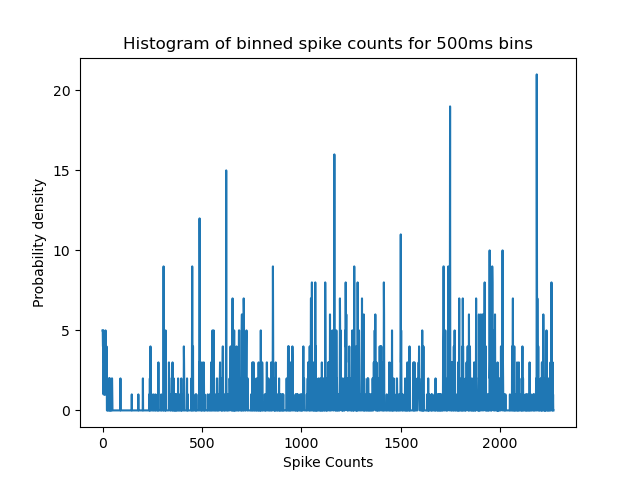

In [31]:
fig, ax = plt.subplots()
# plot histogramm
num_bins = 100
arry = pd.DataFrame({'count':count['count'].values}, index=count.index.get_level_values('bin'))
plt.plot(arry)

ax.set_xlabel('Spike Counts')
ax.set_ylabel('Probability density')
ax.set_title(f"Histogram of binned spike counts for 500ms bins")
# Tweak spacing to prevent clipping of ylabel
plt.show()

In [30]:
count.index.get_level_values('bin')

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268],
           dtype='int64', name='bin', length=2269)

In [12]:
test = count.iloc[:1000]
test

,,count,start index,bin end time,last spike in bin
bin,trial,,,,
0,1,1,0,1892,892
1,1,0,1,2893,892
2,1,1,1,3894,3312
3,1,1,2,4895,3935
4,1,1,3,5896,5770
5,1,0,4,6897,5770
6,1,0,4,7898,5770
7,1,0,4,8899,5770
8,1,0,4,9900,5770


In [15]:
test.swaplevel(0, 1)

count  start index  bin end time  last spike in bin
trial bin                                                     
1     0        1            0          1892                892
      1        0            1          2893                892
      2        1            1          3894               3312
      3        1            2          4895               3935
      4        1            3          5896               5770
      5        0            4          6897               5770
      6        0            4          7898               5770
      7        0            4          8899               5770
      8        0            4          9900               5770
      9        1            4         10901              10424
      10       1            5         11902              11431
      11       0            6         12903              11431
      12       0            6         13904              11431
      13       1            6         14905              14673
      14       0            7         15906              14673
      15       1            7         16907              16009
      16       1            8         17908              17878
      17       0            9         18909              17878
      18       0            9         19910              17878
      19       1            9         20911              20567
      20       1           10         21912              21752
      21       0           11         22913              21752
      22       0           11         23914              21752
      23       1           11         24915              23977
      24       1           12         25916              25647
      25       0           13         26917              25647
      26       0           13         27918              25647
      27       1           13         28919              28205
      28       0           14         29920              28205
      29       0           14         30921              28205
      30       0           14         31922              28205
      31       1           14         32923              31959
      32       0           15         33924              31959
      33       1           15         34925              34675
      34       0           16         35926              34675
      35       1           16         36927              36112
      36       1           17         37928              37597
      37       0           18         38929              37597
      38       0           18         39930              37597
      39       0           18         40931              37597
      40       0           18         41932              37597
      41       1           18         42933              42156
      42       0           19         43934              42156
      43       1           19         44935              44306
      44       1           20         45936              45079
      45       0           21         46937              45079
      46       0           21         47938              45079
      47       1           21         48939              48894
      48       0           22         49940              48894
      49       1           22         50941              50823
      50       0           23         51942              50823
      51       0           23         52943              50823
      52       0           23         53944              50823
      53       0           23         54945              50823
      54       0           23         55946              50823
      55       0           23         56947              50823
      56       0           23         57948              50823
      57       1           23         58949              58578
      58       0           24         59950              58578
      59       0           24         60951              58578
      60       1           24         61952              61506
      61       0           25         6295

In [14]:
test.index.set_levels(['trial'], level=0, inplace=True)

ValueError: On level 0, code max (999) >= length of level (1). NOTE: this index is in an inconsistent state

In [96]:
count.index.get_level_values(1)

CategoricalIndex([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
                  ...
                  nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
                 categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=True, name='trial', dtype='category', length=22676)

In [84]:
count

,,count,start index,bin end time,last spike in bin
bin,trial,,,,
0,1,1,0,1892,892
1,1,0,1,2893,892
2,1,1,1,3894,3312
3,1,1,2,4895,3935
4,1,1,3,5896,5770
...,...,...,...,...,...
22671,NaN,0,1849,22695563,22669863
22672,NaN,0,1849,22696564,22669863
22673,NaN,0,1849,22697565,22669863


#### something else

In [96]:
windows = 50
cluster = 0
step = None
bwidth_cl = window*20
cluster = spikes.spike_df.loc[spikes.spike_df['cluster']==cluster]['spike_times']
start = cluster.iloc[0].astype(int)
end = cluster.iloc[-1].astype(int)
if step == None:
    step = bwidth_cl+1
else:
    step = step*20
# calculate
# start of each bin
bin_starts = np.arange(start, end+1-bwidth_cl, step)
# end of each bin
bin_ends = bin_starts + bwidth_cl
# calculate index of last spike for each bin end
last_idx = cluster.searchsorted(bin_ends, side='left').astype(int)
# calculate index of first spike for each bin start
first_idx = cluster.searchsorted(bin_starts, side='left')
# return number of indexes in between start and end = number of spikes in between
df = pd.DataFrame({'count':(last_idx - first_idx), 'start index':first_idx, 'start time':cluster.iloc[first_idx].values})
df.index.name = 'bin'


In [87]:
cluster

global index  cluster index
21            0                     892
84            1                    3312
100           2                    3935
170           3                    5770
323           4                   10424
                                 ...   
620141        1845             22647479
620172        1846             22648258
620207        1847             22649675
620894        1848             22669863
622259        1849             22699854
Name: spike_times, Length: 1850, dtype: uint64

In [89]:
bin_starts

array([     892,     1893,     2894, ..., 22696565, 22697566, 22698567])

In [78]:
first_idx

array([   0,    1,    1, ..., 1849, 1849, 1849], dtype=int64)

In [97]:
df

,count,start index,start time
bin,,,
0,1,0,892
1,0,1,3312
2,1,1,3312
3,1,2,3935
4,1,3,5770
...,...,...,...
22671,0,1849,22699854
22672,0,1849,22699854
22673,0,1849,22699854


In [71]:
cluster.iloc[first_idx].values

global index  cluster index
21            0                     892
84            1                    3312
              1                    3312
100           2                    3935
170           3                    5770
                                 ...   
622259        1849             22699854
              1849             22699854
              1849             22699854
              1849             22699854
              1849             22699854
Name: spike_times, Length: 22676, dtype: uint64

In [20]:
first_idx.size

22676

In [5]:
# separate bin into 

cluster = spikes.spike_df.loc[spikes.spike_df['cluster']==50]

In [21]:
cluster.iloc[first].size

22676

In [16]:
count.size

22676

In [84]:
df = pd.DataFrame({'count':(last_idx - first_idx)})
df['start index']=first_idx
df

,count,start index
0,1,0
1,0,1
2,1,1
3,1,2
4,1,3
...,...,...
22671,0,1849
22672,0,1849
22673,0,1849
22674,0,1849


In [54]:
df

,count
start index,"[[1], [0], [1], [1], [1], [0], [0], [0], [0], ..."


In [60]:
df = pd.DataFrame({'count':(last_idx - first_idx)})

In [61]:
df

,count
0,1
1,0
2,1
3,1
4,1
...,...
22671,0
22672,0
22673,0
22674,0


In [55]:
df = pd.DataFrame({'start index':first_idx}, )

In [56]:
df

,start index
0,0
1,1
2,1
3,2
4,3
...,...
22671,1849
22672,1849
22673,1849
22674,1849


In [57]:
test = {'count':(last_idx - first_idx)}

In [58]:
test

{'count': array([1, 0, 1, ..., 0, 0, 0], dtype=int64)}

In [51]:
(last_idx - first_idx).reshape(-1,1)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [93]:
df = pd.DataFrame( {'col1':np.arange(0,11,1), 'col2':np.arange(0,11,1)} )

In [94]:
df

,col1,col2
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9
